# Face Detection with Haar Cascades

In [2]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

## Images

In [23]:
mohammad = cv2.imread('Mohammad_size.jpg',0)
mohammad2 = cv2.imread('Mohammad.jpg',0)
solvay = cv2.imread('solvay_conference.jpg',0)

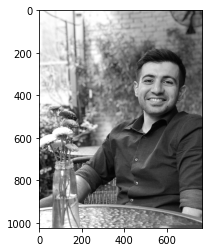

In [24]:
plt.imshow(mohammad,cmap='gray')

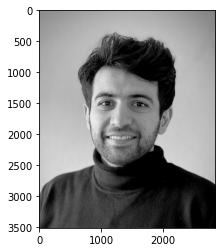

In [25]:
plt.imshow(mohammad2,cmap='gray')

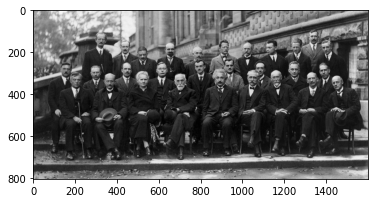

In [26]:
plt.imshow(solvay,cmap='gray')

## Cascade Files

OpenCV comes with these pre-trained cascade files, we've relocated the .xml files for you in our own DATA folder.

## Face Detection

In [27]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')

In [28]:
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

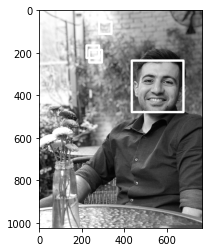

In [29]:
result = detect_face(mohammad)
plt.imshow(result,cmap='gray')

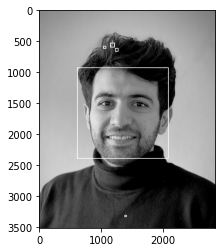

In [30]:
result = detect_face(mohammad2)
plt.imshow(result,cmap='gray')

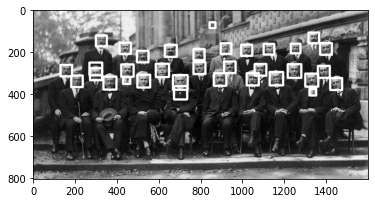

In [31]:
# Gets errors!
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

In [32]:
def adj_detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

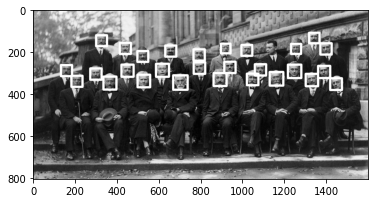

In [33]:
# Doesn't detect the side face.
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

## Eye Cascade File

In [34]:
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

In [35]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

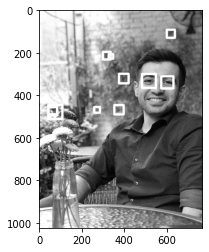

In [36]:
result = detect_eyes(mohammad)
plt.imshow(result,cmap='gray')

In [37]:
eyes = eye_cascade.detectMultiScale(denis) 

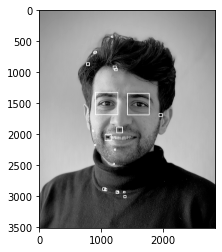

In [38]:
# White around the pupils is not distinct enough to detect Denis' eyes here!
result = detect_eyes(mohammad2)
plt.imshow(result,cmap='gray')

## Conjunction with Video

In [41]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()

KeyboardInterrupt: 